#**HR Analytics: Job Change of Data Scientists**

The project is a study conducted by the HR team to recruit candidates who are interested in becoming a data scientist or looking for a new job after training. This dataset is to understand what factors cause someone to leave their current job and predict the likelihood of a candidate looking for a new job to become a data scientist, as well as interpreting the factors that influence employee decisions. The datasets used are from https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

**Feature (column) **

* enrollee_id: Unique ID for the candidate

* city: city code

* city_ development _index: City development index (scaled)

* gender: Candidate gender

* relevant_experience: Experience of the relevant candidate

* registered_university: Type of data scientist program from the listed University if any

* education_level: Candidate's educational level

* major_discipline: Candidate study program

* Experience: Candidate's experience in several years

* company_size: Number of employees in the current company

* company_type: Current company type

* lastnewjob: Year difference between a previous job and current job

* training_hours: completed training hours

* target: 0 – Not looking for a job change, 1 – Looking for a job change

## **Project work steps**

**Part 1 : Exploratory Data Analysis (EDA) :**
1. Preparation
2. Analysis of the features.

**Part 2 : Supervised Modeling**
1. Preprocessing.
2. Modeling dan Evaluasi.

**Part 3 : Conclusion**

#import libraries

In [ ]:
#processing libraries
import pandas as pd
import numpy as np

#visualizing libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('aug_train.csv')
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#Preparation

In [ ]:
#replace other value with missing value(np.nan)
df.replace(to_replace=['Other'],value=np.nan,inplace=True)

df.loc[df['company_size'] == '10/49', ['company_size']] = '10-49'

df.loc[df['last_new_job'] == 'never', ['last_new_job']] = '0'

df.loc[df['last_new_job'] != '>4', ['last_new_job']] = '0-4'

df['experience'] = df['experience'].map({'<1':'<1',
                                         '1':'1-10',
                                         '2':'1-10',
                                         '3':'1-10',
                                         '4':'1-10',
                                         '5':'1-10',
                                         '6':'1-10',
                                         '7':'1-10',
                                         '8':'1-10',
                                         '9':'1-10',
                                         '10':'1-10',
                                         '11':'11-20',
                                         '12':'11-20',
                                         '13':'11-20',
                                         '14':'11-20',
                                         '15':'11-20',
                                         '16':'11-20',
                                         '17':'11-20',
                                         '18':'11-20',
                                         '19':'11-20',
                                         '20':'11-20',
                                         '>20':'>20',
                                         np.nan:np.nan})

df['target']=df['target'].apply(lambda x: 1 if x==1.0 else 0)

In [ ]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtypes =='object':
    cat.append(i)
  else :
    num.append(i)
            
print(f"variabel numeric : {num}")
print(f"variabel categoric : {cat}")

variabel numeric : ['enrollee_id', 'city_development_index', 'training_hours', 'target']
variabel categoric : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


#Explaratory Data Analyst (EDA)

##How many employees want to switch careers to data science?

Text(0.5, 1.0, 'Change to be Data Scientist')

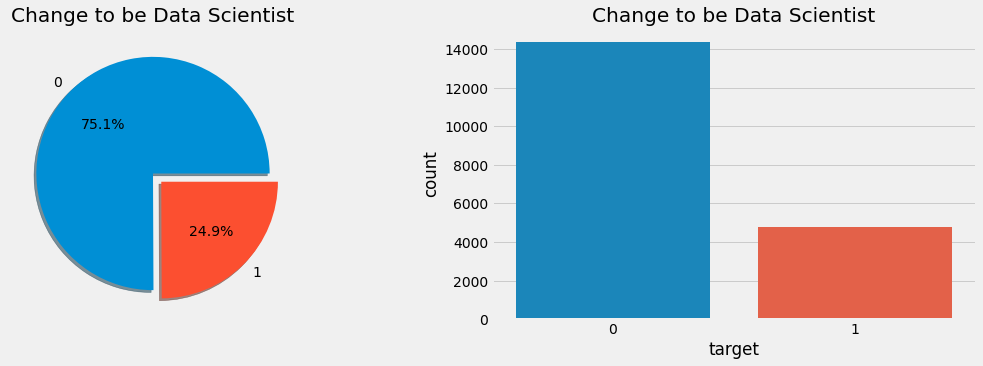

In [ ]:
fig, axes=plt.subplots(1,2, figsize=(17,5))

#axes[0]
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0], shadow=True)
axes[0].set_title('Change to be Data Scientist')
axes[0].set_ylabel('')

#axes[1]
sns.countplot('target',data=df, ax = axes[1])
axes[1].set_title('Change to be Data Scientist')

*   0 : proportion of employees who are not interested in changing professions to become data scientists is  75.1%
*   1 : proportion of  employees who are interested in moving to become data scientists is 24.9%
*   Insight HR: Mengetahui penyebab lebih banyak karyawan yang menetap pada pekerjaan sebelumnya dan tidak tertarik untuk berpindah menjadi data scientist.

Insight : HR should know why more employees are staying in their previous jobs and are not interested in switching to data scientists.


##Analyst the Feature

###single feature x Target

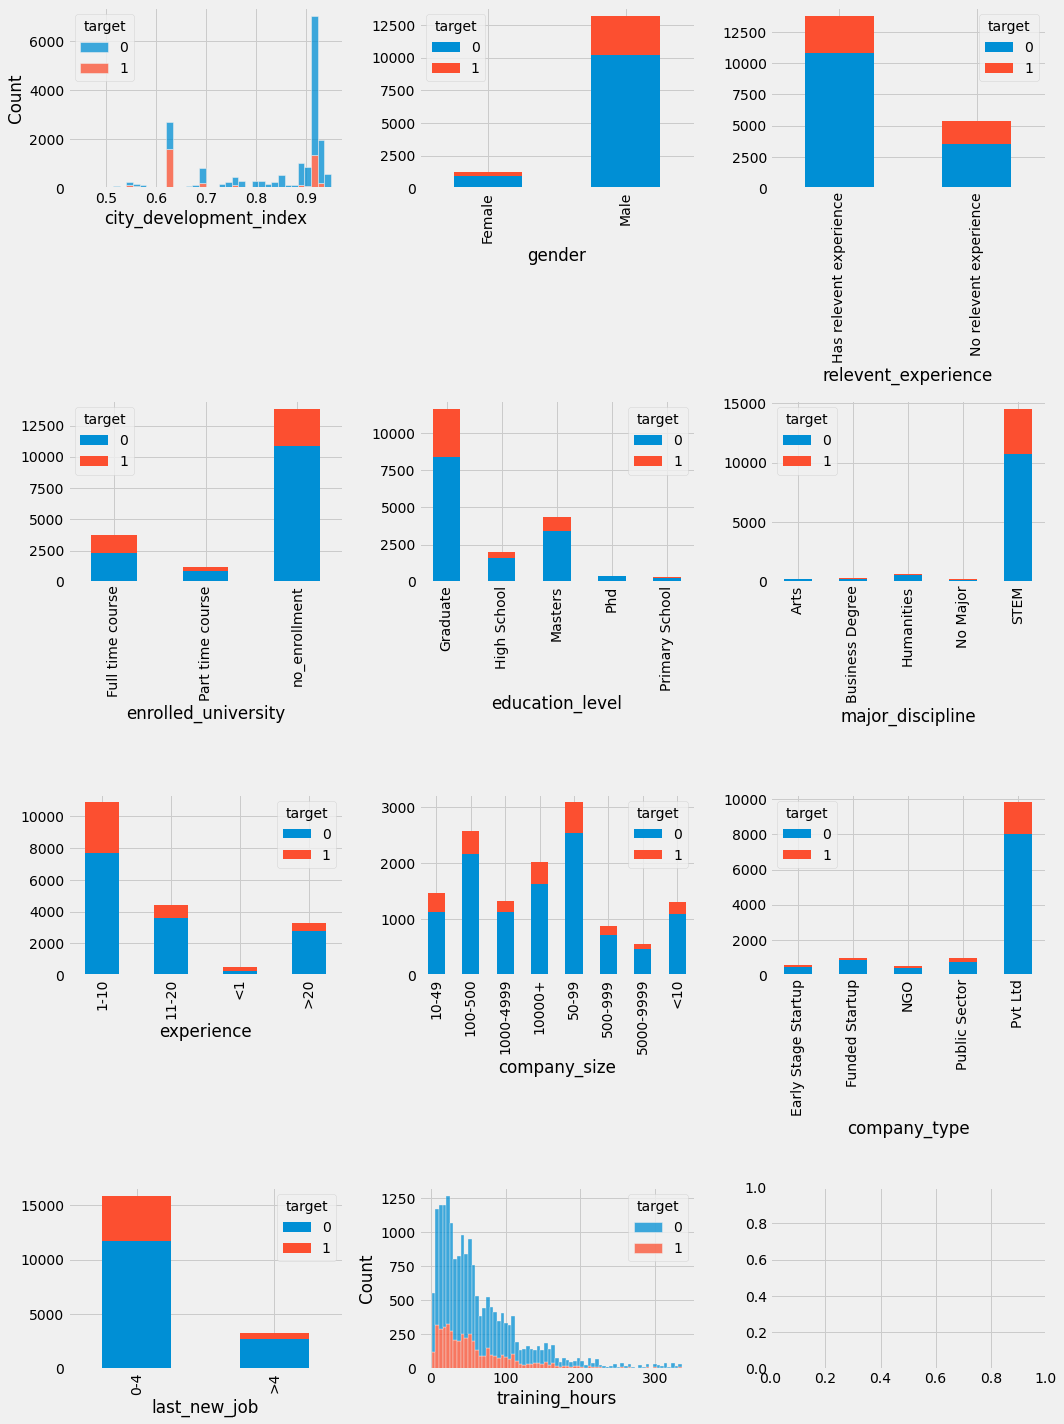

In [ ]:
i = 0
j = 0
fig, axes = plt.subplots(4, 3, figsize = (15, 20))
for col in df.columns :
  if col != 'enrollee_id' and col != 'target' and col !='city' :
    if df[col].dtypes == 'object' :
      df.groupby([col, 'target'])['enrollee_id'].count().unstack().plot(kind = 'bar', stacked = True, ax = axes[i,j])
    else :
      sns.histplot(data = df, x = col, hue = 'target', multiple = 'stack', ax = axes[i,j])
    
    if j == 2 :
      j = 0
      i += 1
    else :
      j += 1
plt.tight_layout()

**City Development index**
*   HR should not look at the high city development index number because there are employees with a city development index number of 0.6 who are interested in moving to become data scientists
*   Insights for HR: Understanding the reasons why cities with a city development scale index scoring above 0.65 have more employees who are not interested in turning into data scientists.

**Education Level**
*   Education level Graduate, Masters, High School, Phd, there are employees who are interested in changing professions to become data scientists, but employees who are not interested in changing professions are still higher than those interested in changing professions to become data scientists.
*   From the five education levels that show the highest interest in changing professions to become a data scientist, it is the Graduate level.
*   This can be a consideration for HR to recruit employees based on High School level education by looking at training hours and relevant experience.

**Last new job**
*   In the last new job 0-4 employees who are interested in changing professions are higher than the last new job >4. However, those who are not interested are also higher than those who are interested in changing professions to become data scientists.
*   This can be considered by HR to recruit employees with last new job >4 because there are still employees who show interest in changing professions to become data scientists, even if a little.

**Training Hourse**

It can be concluded that for training hours of less than 150 hours, the interest of employees who want to change professions is high. If the higher the training hours given, the less interested in changing professions.

###Multiple feature x target

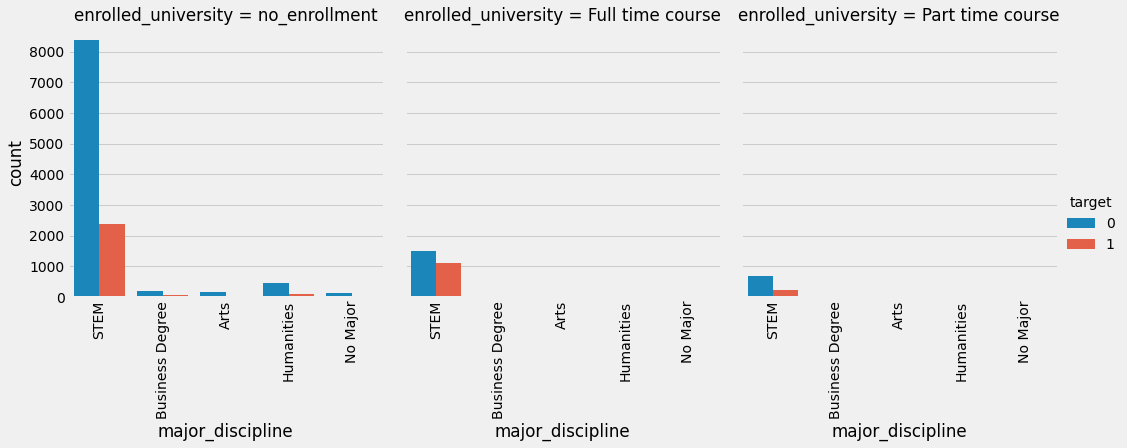

In [ ]:
g=sns.catplot(x='major_discipline',hue='target',kind='count',col='enrolled_university', data=df)
g.set_xticklabels(rotation=90)

**Major Discipline & Enrolled University**
* Major disciplines relevant to data scientists are STEM and Business Degree.
* Enrolled university with no enrollment, part time, or full time course shows that STEM major disciplines have a high enough interest in switching but disinterest in becoming a data scientist is still higher.
* Major discipline Business Degree with enrolled university full time and part time course shows that no one is interested in changing professions to become data scientists. However, enrolled universities with no enrollment have employees who are interested in changing professions but the proportion is less than those who are not interested in changing professions to become data scientists.
* Major discipline Humanities with enrolled university no enrollment and full time course there are employees who are interested in changing professions but the proportion is less than those who are not interested in changing professions to become data scientists. Meanwhile, at enrolled universities with part time courses, the results show that no one is interested in changing professions to become data scientists.
* Major discipline Art and No Major with enrolled university full time and part time course there are no employees who are interested in changing professions to become data scientists. Meanwhile, at enrolled universities with no enrollment, there are employees who are interested in changing professions to become data scientists, but the proportion remains smaller than those who are not interested in changing professions to become data scientists.
* This may be considered by HR if you want to recruit an employee to become a data scientist.

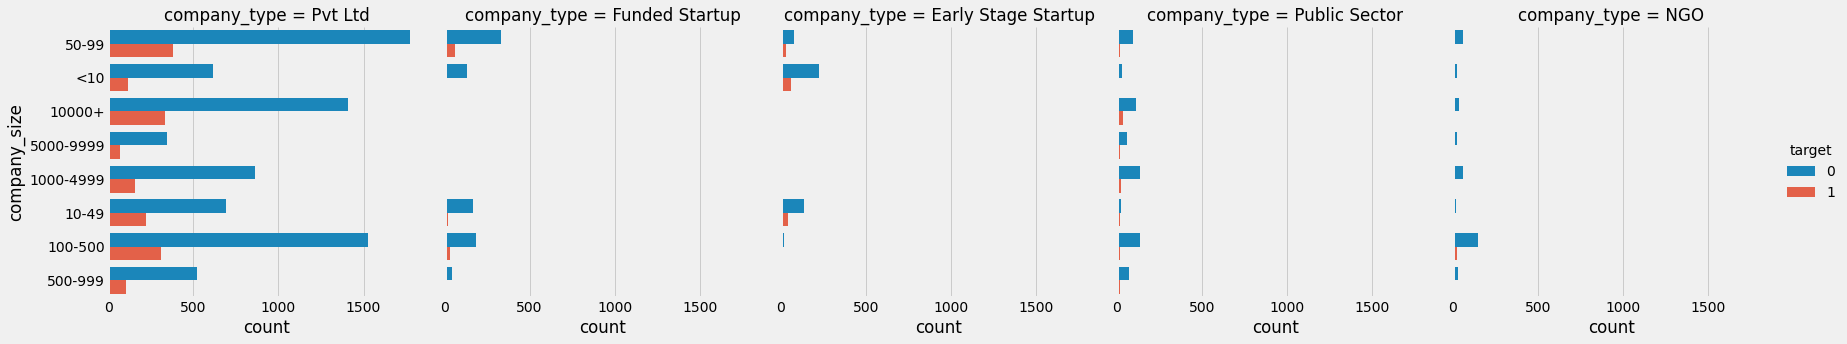

In [ ]:
g=sns.catplot(y='company_size',hue='target',kind='count',col='company_type', data=df)

**Company Type & Company Size**
* In the Early Stage Startup company type with a company size of less than 500 and Funded Startup with a company size of less than 1000, it shows that there are employees who are interested in changing professions but fewer than those who are not interested in changing professions to become data scientists. >1000
* In the Public Sector type company with company size >10, it shows that there are employees who are interested in changing professions but fewer than those who are not interested in changing professions to become data scientists.
* In the NGO type company with a company size of less than 5000, it shows that there are employees who are interested in changing professions but fewer than those who are not interested in changing professions to become data scientists.
* In company type Pvt Ltd with overall company size, it shows that the level of employees who are interested in changing professions to become data scientists is higher than for other company types. However, there is still more interest in not changing professions than those interested in changing professions to become data scientists.
* It should be considered for HR in recruiting employees, it's good not only to look at the company type startup, but from the company type Pvt Ltd showing the highest interest compared to other company types.lain.

<Figure size 2160x2880 with 0 Axes>

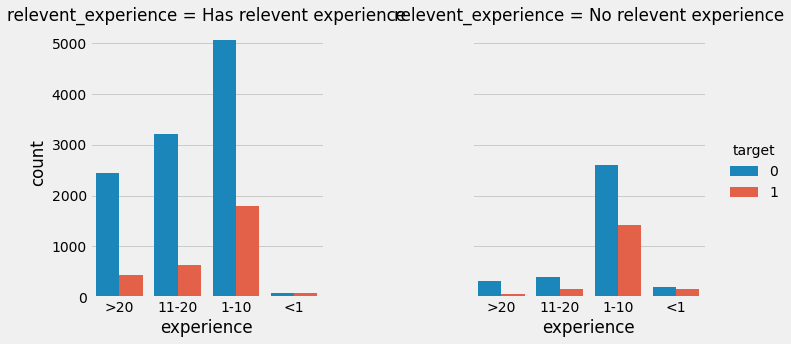

In [ ]:
plt.figure(figsize=(30,40))
sns.catplot(hue='target',x='experience',col='relevent_experience',kind='count', data=df)
plt.tight_layout()

**Relevent Experience & Experience**
* From the bar chart above, it can be seen that for employees with experience > 20 and 1-20, more employees are not interested in changing professions to become data scientists.

* HR Insights: Understanding the reasons why employees with >1 year experience do not have an interest in moving to become data scientists.

#Cleansing

##Mising Value

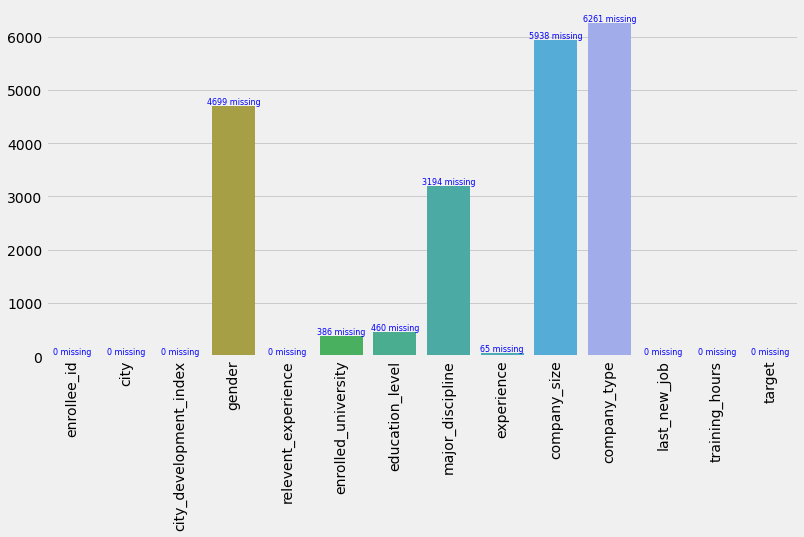

In [ ]:
plt.figure(figsize=(12,6))
plot=sns.barplot(x=df.columns, y=df.isna().sum())
plt.xticks(rotation=90)
for bar in plot.patches:
  value = int(bar.get_height())
  
  text=f"{value} missing"
  textX=bar.get_x()+ bar.get_width()/2
  textY=bar.get_y() + value
  plot.text(textX, textY, text, ha='center', va='bottom', color='b', size=8)

In [ ]:
#handling missing value
dfmissing = pd.Series(df.isna().sum().sort_values(ascending=False))
dfmissing = dfmissing[dfmissing != 0]
for col in dfmissing.index:
  df[col] = df[col].fillna(df[col].mode()[0])

##Outlier

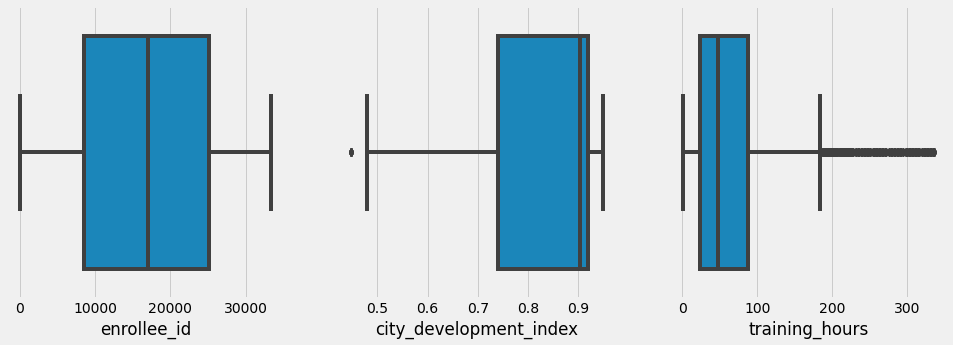

In [ ]:
i = 0
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for col in num :
  if col !='target':
    sns.boxplot(df[col], ax = axes[i])
    i+=1

In [ ]:
#Handlin Outlier
for i in num:
  if i !='target':
    q1=round(np.percentile(df[i],25),2)
    q3=round(np.percentile(df[i],75),2)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df.loc[df[i] < lb, i] = lb
    df.loc[df[i] > ub, i] = ub

In [ ]:
#save to csv for tableu
df.to_csv('projekHR.csv', index=False)

In [ ]:
#drop unique fiture from dataset
df.drop(labels=['enrollee_id','city'],axis=1,inplace=True)

##engenering fitur

In [ ]:
#label encoding
df['relevent_experience'] = df['relevent_experience'].map({'No relevent experience':1,
                                                           'Has relevent experience':2})
df['enrolled_university'] = df['enrolled_university'].map({'no_enrollment':1,
                                                           'Part time course':2,
                                                           'Full time course':3})
df['education_level'] = df['education_level'].map({'Primary School':1,
                                                   'High School':2,
                                                   'Graduate':3,
                                                   'Masters':4,
                                                   'Phd':5})
df['major_discipline'] = df['major_discipline'].map({'No Major':1,
                                                   'Arts':2,
                                                   'Humanities':3,
                                                   'Business Degree':4,
                                                   'STEM':4})
df['experience'] = df['experience'].map({'<1':1,
                                         '1-10':2,
                                         '11-20':3,
                                         '>20':4})
df['company_size'] = df['company_size'].map({'10000+':1,
                                             '5000-9999':2,
                                             '1000-4999':2,
                                             '500-999':3,
                                             '100-500':3,
                                             '50-99':4,
                                             '10-49':4,
                                             '<10':4})
df['last_new_job'] = df['last_new_job'].map({'>4':1,
                                             '0-4':2})

#one hot encoding
dfModel= pd.get_dummies(df, columns = ['gender','company_type'])


In [ ]:
dfModel.head(2)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,2,1,3,4,4,4,2,36.0,1,0,1,0,0,0,0,1
1,0.776,1,1,3,4,3,4,1,47.0,0,0,1,0,0,0,0,1


In [ ]:
#Scalling
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler,normalize
scaler = RobustScaler()
dfModel.iloc[:,[0,1,2,3,4,5,6,7,8]] = scaler.fit_transform(dfModel.iloc[:,[0,1,2,3,4,5,6,7,8]])

In [ ]:
dfModel.head(2)

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Public Sector,company_type_Pvt Ltd
0,0.094444,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-0.169231,1,0,1,0,0,0,0,1
1,-0.705556,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.000000,0,0,1,0,0,0,0,1


In [ ]:
#define X an Y for models
X = dfModel.drop(columns = ['target'])
y = dfModel['target']

#spilting train test data
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#balencing imbalenc data
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_train,y_train = oversampler.fit_resample(X_train,y_train)

# Modeling : Supervised Learning

In [ ]:
#metric evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

##KNN

Akurasi model KNN 69.00 %
Report Metrics KNN 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77      2882
           1       0.42      0.70      0.53       950

    accuracy                           0.69      3832
   macro avg       0.65      0.69      0.65      3832
weighted avg       0.76      0.69      0.71      3832

Confuction Matrix KNN 


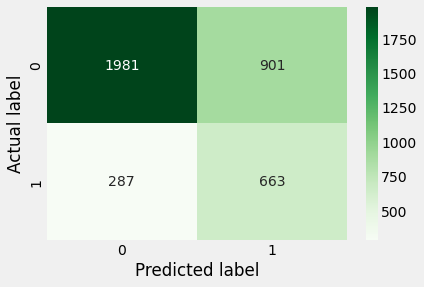

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
akurasiKNN = accuracy_score(y_test, y_pred)
print('Akurasi model KNN', "{:.2f}".format(akurasiKNN * 100),'%')
print(f"Report Metrics KNN \n {classification_report(y_test, y_pred)}")

print(f"Confuction Matrix KNN ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

##decesion tree

Akurasi model Dec Tree 72.36 %
Report Metrics Decesion Tree 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      2882
           1       0.46      0.64      0.53       950

    accuracy                           0.72      3832
   macro avg       0.66      0.69      0.67      3832
weighted avg       0.76      0.72      0.74      3832

Confuction Matrix Decesion Tree


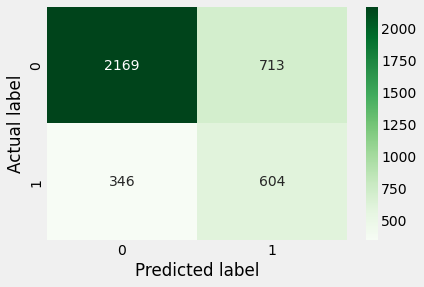

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=12)
dtree.fit(X_train, y_train)
y_predDT = dtree.predict(X_test)
akurasiDt = accuracy_score(y_test, y_predDT)
print('Akurasi model Dec Tree', "{:.2f}".format(akurasiDt * 100),'%')
pred = pd.DataFrame(y_predDT, columns=['predict'])
print(f"Report Metrics Decesion Tree \n {classification_report(y_test, y_predDT)}")

print(f"Confuction Matrix Decesion Tree")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predDT), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
2024+572

2596

##Random Forest

Akurasi model Random Forest 72.57 %
Report Metrics Random Forest 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      2882
           1       0.45      0.47      0.46       950

    accuracy                           0.73      3832
   macro avg       0.64      0.64      0.64      3832
weighted avg       0.73      0.73      0.73      3832

Confuction Matrix Random Forest


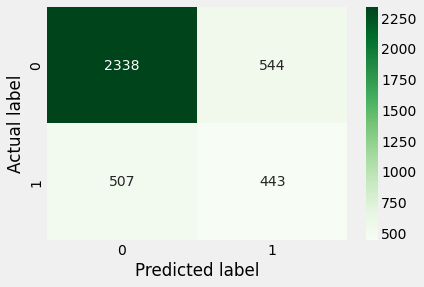

In [ ]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =255 ) 
clf.fit(X_train, y_train)

y_predRF = clf.predict(X_test)
akurasiRF = accuracy_score(y_test, y_predRF)
print('Akurasi model Random Forest', "{:.2f}".format(akurasiRF * 100),'%')
pred = pd.DataFrame(y_predRF, columns=['predict'])
print(f"Report Metrics Random Forest \n {classification_report(y_test, y_predRF)}")

print(f"Confuction Matrix Random Forest")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predRF), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
2321+438

2759

##Support Vector Machine

Akurasi model SVM 74.50 %
Report Metrics SVM 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      2882
           1       0.49      0.63      0.55       950

    accuracy                           0.75      3832
   macro avg       0.68      0.71      0.69      3832
weighted avg       0.77      0.75      0.75      3832

Confuction Matrix SVM 


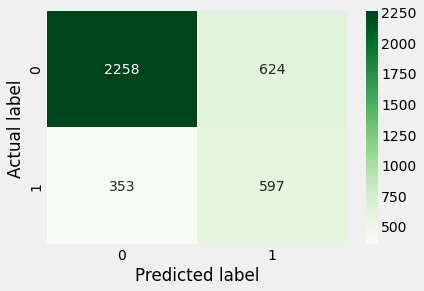

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly')
model_svm.fit(X_train, y_train)
y_predict = model_svm.predict(X_test)
akurasiSVM = accuracy_score(y_test, y_predict)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(y_test, y_predict)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
2223+602

2825

##xgboost

Akurasi model xgb 74.61 %
Report Metrics xgb 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2882
           1       0.49      0.41      0.45       950

    accuracy                           0.75      3832
   macro avg       0.65      0.64      0.64      3832
weighted avg       0.73      0.75      0.74      3832

Confuction Matrix xgb 


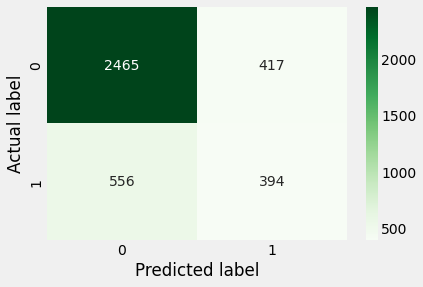

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,max_depth=10)
xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)
akurasixgb = accuracy_score(y_test, y_predxgb)
print('Akurasi model xgb', "{:.2f}".format(akurasixgb * 100),'%')
print(f"Report Metrics xgb \n {classification_report(y_test, y_predxgb)}")

print(f"Confuction Matrix xgb ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predxgb), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
2463+394

2857

#Conclusion

**Insight**

Single Feature X Target
* Knowing the cause of the city development index with a value of 0.65 - 0.9 more employees are not interested in changing professions, but in the city development index 0.6 the interest in changing professions is quite high.
* At the education level, the largest number of enthusiasts to change professions in order are the Graduate, Masters, High School and Primary School levels. This is in line with the employee's training hours and relevant experience features.
* In the last new job feature with a value of 0-4, the interest in changing professions is higher than >4
* In the table above, it can be concluded that for training hours less than 150 hours, the interest of employees who want to change professions is high. If the higher the training hours given, the less interested in changing professions.

Multiple Features X Target
* In Major Discipline X Enrolled University, the one with the highest interest is STEM with all types of enrollment. However, with no enrollment, there are other Major Disciplines who are also interested in changing professions, namely Business Degrees and Humanities.
* In Company Type X Company Size, the one with the highest interest is Pvt Ltd with a company size of 50 - 500 and >10000 employees. In addition, there are company size Funded Startups, Early Stage Startups and the Public Sector.
* In Relevant Experience X Experience who has an interest in moving at a value of 1-10 years.

**Model**

The recommended model for deployment is Support Vector Machine (SVM) because the accuracy is 74% this value is the largest accuracy compared to other models then evaluate the recall value for those who want to become data scientists (value 1 in the target column) of 62%. 